<a href="https://colab.research.google.com/github/jjindia/ML/blob/main/1_DecisionTreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

# Decision Tree Classification

A decision tree can be used to learn a piece-wise linear decision boundary between classes. We demonstrate the working of a decision tree on the entire of Iris dataset. We use sklearn.tree.DecisionTreeClassifier.

The example was taken from: http://scikit-learn.org/stable/modules/tree.html#classification.

The decision boundaries learnt by the different decision nodes can be visualized as described here: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#plot-the-decision-surface-of-a-decision-tree-on-the-iris-dataset.

In this tutorial we will demonstrate this with the example of classifying a part of the <a href=https://archive.ics.uci.edu/ml/datasets/Iris> Iris dataset.</a>


 Ref: https://github.com/Santara/ML-MOOC-NPTEL/ 

# Prepare the data-set

In [2]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

# Fit the model

In [3]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Visualize the model

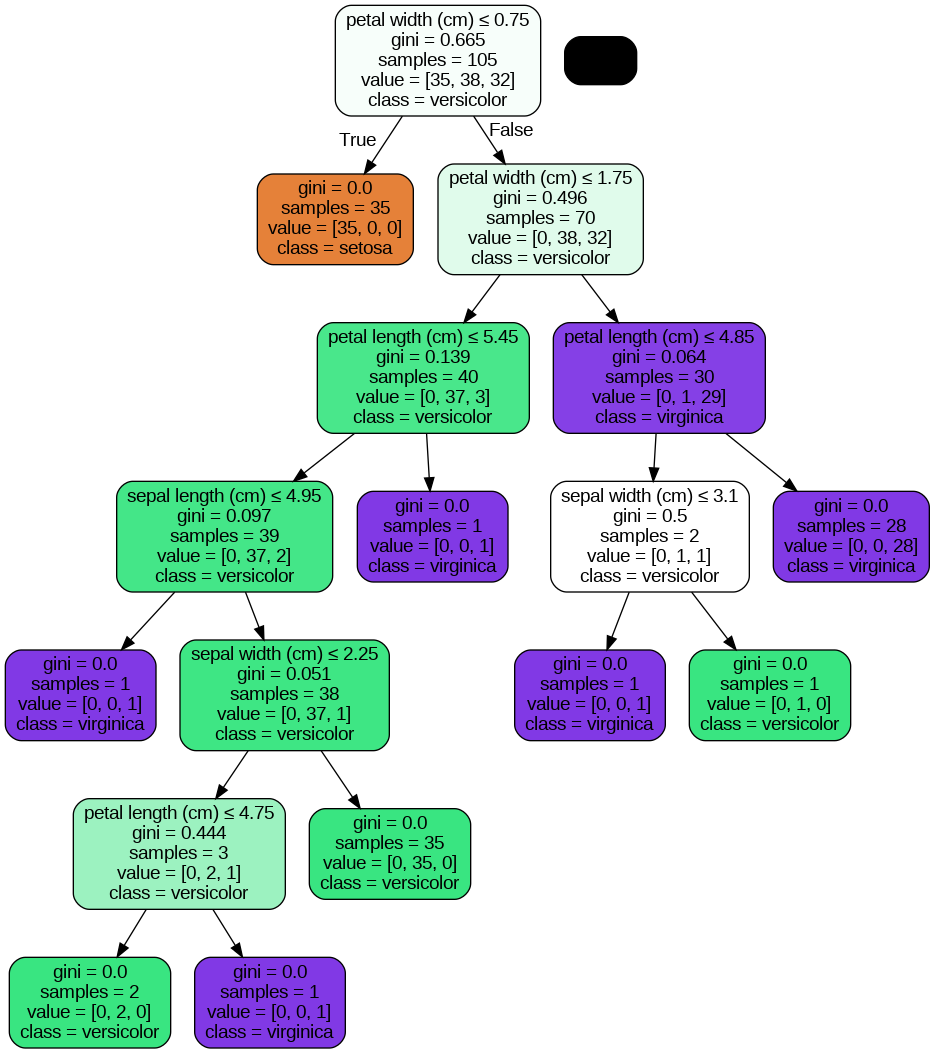

In [6]:
from six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

The gini coefficient is a measure of homogenity in a cluster. Gini coefficient of 0.0 indicates that a cluster is completely homogeneous (i.e. only one class is present in the cluster).

# Evaluate the model

In [7]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print( 'validation misclassification percentage =', validation_misclassification_percentage, '%' )

test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print( 'test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 4.545454545454546 %
test misclassification percentage = 4.545454545454546 %
